___
# PROJETO 1

## <font color='green'>Bruno Dratcu</font>
___

## <font color='green'>Os aposentados estão melhores que o restante de população?</font>

## Introdução

Quais as diferenças entre os aposentados de hoje em dia e os que ainda irão se aposentar?

lista para compreender:
 - aposentados de hoje em dia são aqueles com mais de 65 anos;
 - ver o curso mais elevado desses aposentados comparando quando eles começaram a trabalhar, a partir dai vamos ver suas rendas
 
 - após analisa-los, veremos os cursos mais elevados dos que irão se aposentar ainda;
 - comparar curso mais elevado deles, vemos as difernças dos aposentados, e ver quando eles começaram a trabalhar
 - pegarems suas rendas e comparar com os aposentados 
 
 - pegar a região na qual tem maior população de aposentados, e ver seus cursos mais elevados em que frequentaram


___
## Análise e Resultados

##NOTAS:

UF ; Unidade de Federação
V8005;3 ;Idade do morador 
V0302;2 ;Sexo
V6002;1 ;Rede de ensino 
V6007;2 ;Curso mais elevado que frequentou anteriormente 
V9891;1 ;Faixa de idade em que começou a trabalhar 
V4706;2 ;Posição na ocupação no trabalho principal 
V4707;1 ;Horas habitualmente trabalhadas por semana em todos os trabalhos 
V4719;12; Rendimento mensal de todos os trabalhos para pessoas de 10 anos ou mais de idade 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import os


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruno Dratcu\Desktop\2o Semestre\Ciencia dos Dados\CD\Projeto1


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [5]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
#pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")

In [6]:
pnad2014.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [7]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [8]:
pnad2014.columns = estrutura.Coluna

In [9]:
pnad2014.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [10]:
tabela = pnad2014.loc[:, ["UF", "V8005", "V0302", "V6002", "V6007", "V9891", "V4706", "V4707", "V4719"]]

#tabela

In [11]:
escolhas = pd.DataFrame()

escolhas["Idade"] = tabela.V8005
escolhas["Sexo"] = tabela.V0302
#escolhas["Aposentados"] = tabela.V9122
escolhas["Rede de ensino"] = tabela.V6002
escolhas["Curso mais elevado que frequentou"] = tabela.V6007
escolhas["Faixa de idade em que começou a trabalhar"] = tabela.V9891
escolhas["Posição no trabalho"] = tabela.V4706
escolhas["Horas habitualmente trabalhadas por semana"] = tabela.V4707
escolhas["Rendimento"] = tabela.V4719

#escolhas

In [33]:
n = len(tabela)
tabela.Regiões = pd.Series([""]*n)
tabela.Maturidade = pd.Series([""]*n)
tabela.Intelectualidade = pd.Series([""]*n)
tabela.Geracao = pd.Series([""]*n)


escolhas["Regiões"] = tabela.UF
norte = escolhas.Regiões[(tabela.UF>=11) & (tabela.UF<=17)] = "Norte"
nordeste = escolhas.Regiões[(tabela.UF>=21) & (tabela.UF<=29)] = "Nordeste"
sudeste = escolhas.Regiões[(tabela.UF>=31) & (tabela.UF<=35)] = "Sudeste"
sul = escolhas.Regiões[(tabela.UF>=41) & (tabela.UF<=43)] = "Sul"
centro_oeste = escolhas.Regiões[(tabela.UF>=50) & (tabela.UF<=53)] = "Centro-Oeste"


escolhas["Maturidade"] = tabela.V9891
maturo = escolhas.Maturidade[(tabela.V9891>=20) & (tabela.V9891<=30)] = "Maturo para trabalhar"
imaturo = escolhas.Maturidade[(tabela.V9891>=10) & (tabela.V9891<=19)] = "Imaturo para trabalhar"
velhos_maturos = escolhas.Maturidade[(escolhas.Geracao==velhos)|((tabela.V9891>=20) & (tabela.V9891<=30))] = "Aposentados maturos para trabalhar (completou o E.M.)"
adultos_maturos = escolhas.Maturidade[(escolhas.Geracao==adultos)|((tabela.V9891>=10) & (tabela.V9891<=19))] = "Adultos maturos para trabalhar (completou o E.M.)"


escolhas["Intelectualidade"] = tabela.V6007
intelectual = escolhas.Intelectualidade[(tabela.V6007==5)|((tabela.V6007>=7) & (tabela.V6007<=9))] = "Tiveram o E.M. completo"
nao_intelectual = escolhas.Intelectualidade[(tabela.V6007==6)|((tabela.V6007<=4) & (tabela.V6007>=10))] = "Abaixo do E.M."


escolhas["Geracao"] = tabela.V8005
adultos = escolhas.Geracao[(tabela.V8005>=23) & (tabela.V8005<=50)] = "Adultos (entre 23 e 50 anos)"
adultos_espertos = escolhas.Geracao[(escolhas.Intelectualidade==intelectual)|((tabela.V8005>=23) & (tabela.V8005<=50))] = "Adultos com E.M. completo"
velhos = escolhas.Geracao[(tabela.V8005>50) & (tabela.V8005<=100)] = "Idosos (de 50 para cima)"
velha_geracao = escolhas.Geracao[(escolhas.Intelectualidade==intelectual)|((tabela.V8005>50) & (tabela.V8005<=100))] = "Aposentados com E.M. completo"




C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on

In [16]:
escolhas.UF = tabela.UF.astype('category')
escolhas.UF.cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
                              'Amapá', 'Tocantins', 'Maranhão','Piauí', 'Ceará',
                              'Rio Grande do Norte','Paraíba', 'Pernambuco', 'Alagoas', 
                              'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 
                              'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 
                              'Rio Grande do Sul','Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
                              'Distrito Federal')

escolhas.idade = tabela.V8005.astype('category')
#tabela.idade.cat.categories = ()

escolhas.sexo = tabela.V6002.astype('category')
escolhas.sexo.cat.categories = ("Homem", "Mulher")

#escolhas.aposentados = tabela.V9122.astype('category')
#tabela.idade.cat.categories = ("Sim", "Nao")

escolhas.rede_de_ensino = tabela.V6002.astype('category')
escolhas.rede_de_ensino.cat.categories = ("Pública", "Privada")

escolhas.curso_mais_elevado = tabela.V6007.astype('category')
escolhas.curso_mais_elevado.cat.categories = ('Elementar', 'Médio 1o ciclo', 'Médio 2o ciclo', 'Regular do E.F.',
                                            'Regular do E.M.', 'Supletivo do E.F.', 'Supletivo do E.M.', 'ensino superior',
                                            'Mestrado/doutorado', 'Alfabetização (jovens/adultos)', 'Creches', 
                                            'Classe de alfabetização', 'Maternal/jardim') 

escolhas.comecou_trabalho = tabela.V9891.astype('category')
escolhas.comecou_trabalho.cat.categories = ("Até 9 anos", "10 a 14 anos", "15 a 17 anos",
                                          "18 a 19 anos", "20 a 24 anos", "25 a 29 anos",
                                          "30 anos ou mais") 

escolhas.posicao_trabalho = tabela.V4706.astype('category')
escolhas.posicao_trabalho.cat.categories = ('Empregado com carteira de trabalho', 'Militar', 'Funcionário público',
                                          'Empregado sem carteira', 'Trabalhador doméstico com carteira', 'Trabalhador doméstico sem carteira', 
                                          'Conta própria', 'Empregador', 'Trabalhador na produção para o próprio consumo', 'Trabalhador na construção para o próprio uso',
                                          'Não remunerado')

escolhas.horas_trabalhadas = tabela.V4707.astype('category')
escolhas.horas_trabalhadas.cat.categories = ('Até 14 horas', '15 - 39 horas', 
                                           '40 - 44 horas', '45 - 48 horas', 
                                           '49 horas ou mais')

escolhas.rendimento_mensal = tabela.V4719.astype('category')
#tabela.rendimento_mensal.cat.categories = ()

#escolhas

In [ ]:
reg = escolhas.Regiões.value_counts(True)*100
#reg

In [ ]:
idade = escolhas.idade #.value_counts(True)#*1000
#idade

In [ ]:
#idade.value_counts().plot.bar()

In [ ]:
#idade.value_counts().plot.pie()

In [ ]:
sexo = escolhas.sexo.value_counts(True)*100
#sexo

In [ ]:
#plot = sexo.plot(kind='bar',title='Sexo',figsize=(6, 6), color=('pink','b'))
#plt.ylabel('Freq.Relativa (em%)')

In [ ]:
#plot = sexo.plot(kind='pie',colors=('pink','b'),title='Sexo',autopct='%.1f',figsize=(6, 6))

In [ ]:
ensi = escolhas.rede_de_ensino.value_counts(True)*100
#ensi

In [ ]:
#plot = ensi.plot(kind='bar',title='Rede de Ensino',figsize=(6, 6), color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [ ]:
#plot = ensi.plot(kind='pie',colors=("g", "gold"), title='Rede de Ensino',autopct='%.1f',figsize=(6, 6))

In [ ]:
curso = escolhas.curso_mais_elevado.value_counts(True)*100
#curso

In [ ]:
#plot = curso.plot(kind='bar',title='Curso mais elevado',figsize=(6, 6)) #, color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [ ]:
#plot = curso.plot(kind='pie', title='Curso mais elevado',autopct='%.1f',figsize=(6, 6))

In [ ]:
idade_trab = escolhas.comecou_trabalho.value_counts(True)*100
#idade_trab

In [ ]:
#plot = idade_trab.plot(kind='bar',title='Idade em que começou a trabahar',figsize=(6, 6)) #, color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [ ]:
#plot = idade_trab.plot(kind='pie', title='Idade em que começou a trabahar',autopct='%.1f',figsize=(6, 6))

In [ ]:
posi = escolhas.posicao_trabalho.value_counts(True)*100
#posi

In [ ]:
#plot = posi.plot(kind='bar',title='Posição no trabalho',figsize=(6, 6)) #, color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [ ]:
#plot = posi.plot(kind='pie', title='Posição no trabalho',autopct='%.1f',figsize=(6, 6))

In [ ]:
horas = escolhas.horas_trabalhadas.value_counts(True)*100
#horas

In [ ]:
#plot = horas.plot(kind='bar',title='Horas trabalhadas',figsize=(6, 6)) #, color=("g", "gold"))
#plt.ylabel('Freq.Relativa (em%)')

In [ ]:
#plot = horas.plot(kind='pie', title='Horas trabalhadas',autopct='%.1f',figsize=(6, 6))

In [ ]:
rendi = escolhas[(escolhas.rendimento_mensal != 999999999999) & (~escolhas.rendimento_mensal.isnull())]
#rendi.describe()

velhos vs Intelectualidade e adultos vs Intelectualidade

velhos_maturos vs Intelectualidade e adultos_maturos vs Intelectualidade

velha_geracao vs renda e adultos_espertos vs renda

In [17]:
#Grafico que mostra os aposentados que tiveram uma bom ensino de estudo cruzado com quantos anos começou a trabalhar

print('Tabela Cruzada por CURSO MAIS ELEVADO vs QUANDO COMEÇOU A TRABALHAR? (em %):')
ct2=pd.crosstab(velha_geracao, escolhas.Maturidade, margins=True,rownames=['Curso'], colnames=['Quando começou a trabalhar?'])

ct3=(ct2/len(escolhas)*100).round(decimals=0)
ct3


Tabela Cruzada por CURSO MAIS ELEVADO vs QUANDO COMEÇOU A TRABALHAR? (em %):


Quando começou a trabalhar?,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
Curso,,,,,,,,
Aposentados com E.M. completo,5.0,18.0,15.0,9.0,4.0,1.0,0.0,52.0
All,5.0,18.0,15.0,9.0,4.0,1.0,0.0,52.0


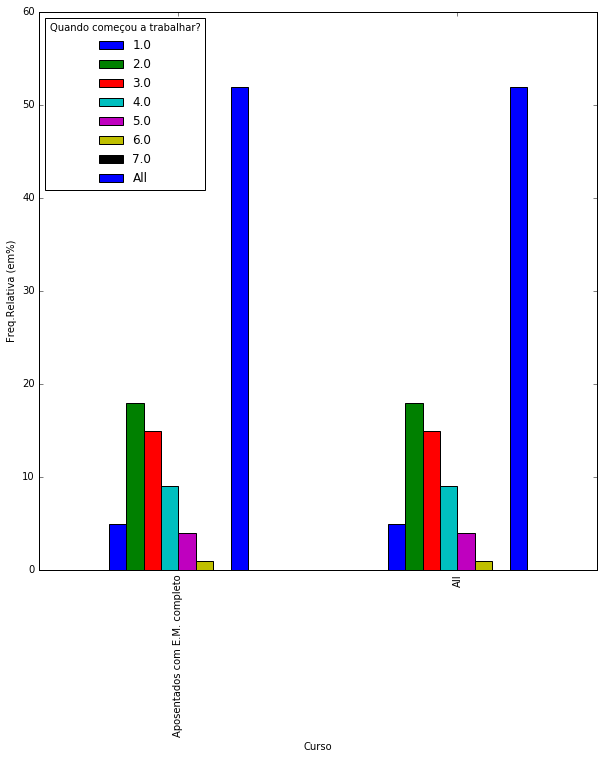

In [18]:
plot = ct3.plot(kind='bar', figsize=(10, 10))
plt.ylabel('Freq.Relativa (em%)')

In [19]:
#Grafico que mostra os aposentados que começaram a trabalhar com uma idade após o E.S. cruzando com a posição do trabalho

print('Tabela Cruzada por COMEÇOU A TRABALHAR (com uma idade matura) vs POSIÇÃO NO TRABALHO (em %):')
ct4=pd.crosstab(maturo, escolhas.posicao_trabalho, margins=True,rownames=['Idade matura que começou a trabalhar'], colnames=['Posição no trabalho'])

ct5=(ct4/len(escolhas)*100).round(decimals=0)
ct5

Tabela Cruzada por COMEÇOU A TRABALHAR (com uma idade matura) vs POSIÇÃO NO TRABALHO (em %):


Posição no trabalho,Empregado com carteira de trabalho,Militar,Funcionário público,Empregado sem carteira,Trabalhador doméstico com carteira,Trabalhador doméstico sem carteira,Conta própria,Empregador,Trabalhador na produção para o próprio consumo,Trabalhador na construção para o próprio uso,Não remunerado,All
Idade matura que começou a trabalhar,,,,,,,,,,,,
Maturo para trabalhar,19.0,0.0,4.0,7.0,1.0,2.0,11.0,2.0,2.0,0.0,1.0,49.0
All,19.0,0.0,4.0,7.0,1.0,2.0,11.0,2.0,2.0,0.0,1.0,49.0


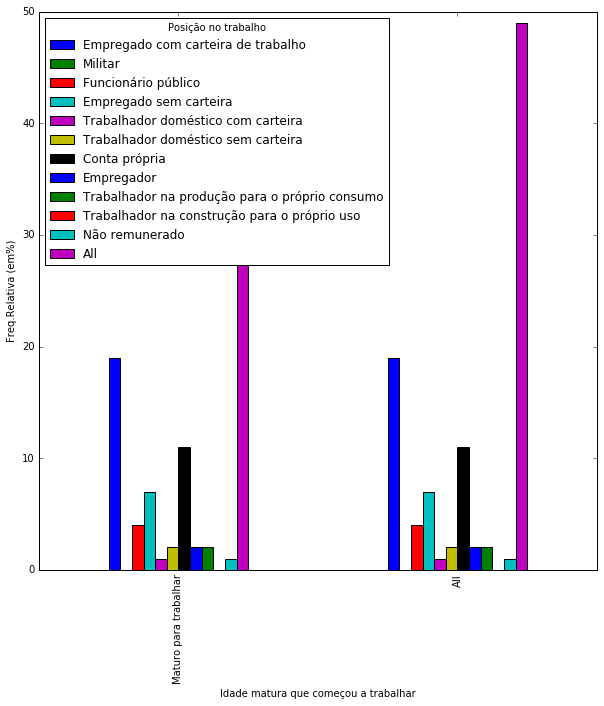

In [20]:
plot = ct5.plot(kind='bar', figsize=(10, 10))
plt.ylabel('Freq.Relativa (em%)')

In [21]:
#Grafico que mostra os aposentados cruzado com quantos anos começaram a trabalhar

print('Tabela Cruzada por ADULTOS TRABALHANDO vs COM QUANTOS ANOS COMEÇOU A TRABALHAR? (em %):')
x=pd.crosstab(velha_geracao, escolhas.comecou_trabalho, margins=True,rownames=['Adultos já trabalhando'], colnames=['Quando começaram a trabalhar?'])

x1=(x/len(escolhas)*100).round(decimals=0)
x1

Tabela Cruzada por ADULTOS TRABALHANDO vs COM QUANTOS ANOS COMEÇOU A TRABALHAR? (em %):


Quando começaram a trabalhar?,Até 9 anos,10 a 14 anos,15 a 17 anos,18 a 19 anos,20 a 24 anos,25 a 29 anos,30 anos ou mais,All
Adultos já trabalhando,,,,,,,,
Aposentados com E.M. completo,5.0,18.0,15.0,9.0,4.0,1.0,0.0,52.0
All,5.0,18.0,15.0,9.0,4.0,1.0,0.0,52.0


In [22]:
#conclusão: os aposentados que tiveram bom cargo, começaram a trbalhar depois dos estudos (bem-formados), ganharam mais??

In [23]:
#Grafico que mostra os adultos que trabalham cruzado com quantos anos começaram a trabalhar

print('Tabela Cruzada por ADULTOS TRABALHANDO vs COM QUANTOS ANOS COMEÇOU A TRABALHAR? (em %):')
x=pd.crosstab(adultos, escolhas.comecou_trabalho, margins=True,rownames=['Adultos já trabalhando'], colnames=['Quando começaram a trabalhar?'])

x1=(x/len(escolhas)*100).round(decimals=0)
x1

Tabela Cruzada por ADULTOS TRABALHANDO vs COM QUANTOS ANOS COMEÇOU A TRABALHAR? (em %):


Quando começaram a trabalhar?,Até 9 anos,10 a 14 anos,15 a 17 anos,18 a 19 anos,20 a 24 anos,25 a 29 anos,30 anos ou mais,All
Adultos já trabalhando,,,,,,,,
Adultos (entre 23 e 50 anos),5.0,18.0,15.0,9.0,4.0,1.0,0.0,52.0
All,5.0,18.0,15.0,9.0,4.0,1.0,0.0,52.0


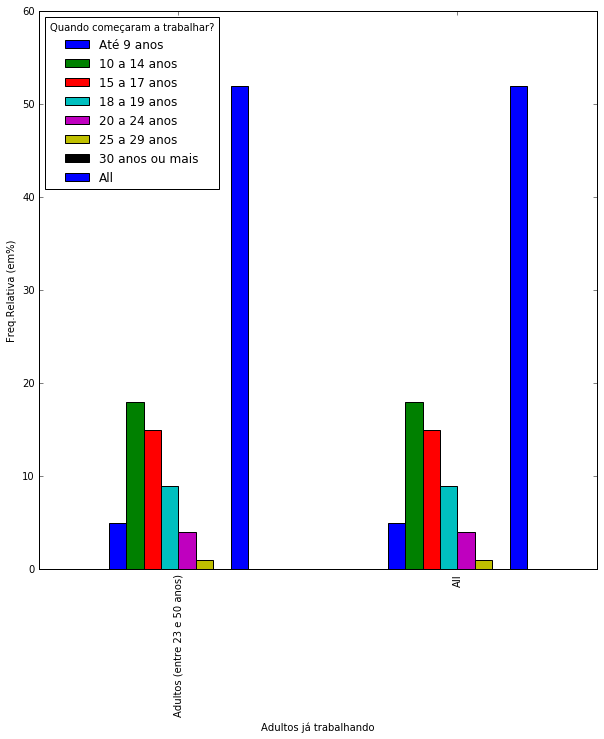

In [24]:
plot = x1.plot(kind='bar', figsize=(10, 10))
plt.ylabel('Freq.Relativa (em%)')

In [25]:
#Grafico que mostra os jovens que irão se aposentar, o curso mais elevado cruzado com quando eles começaram a trabalhar


In [26]:
#Grafico que mostra a renda pela posição do trbalho

#conclusão: vendo os graficos, é possivel ver que os jovens de hoje estudam mais/menos do que os aposentados antigamento, consequentimento tiveram cargos melhores/piores do que os aposentados, tendo entao, uma renda maior/menor

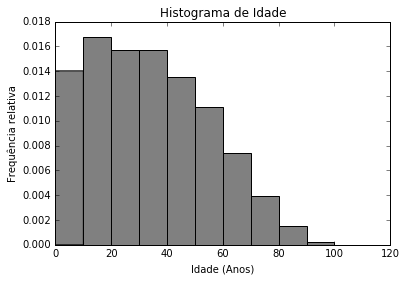

In [27]:
escolhas["Idade"].describe()

faixa = arange(0,120,10)

plot = escolhas["Idade"].plot.hist(bins=faixa, normed=1, color="gray")
plt.title("Histograma de Idade")
plt.xlabel("Idade (Anos)")
plt.ylabel("Frequência relativa")

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


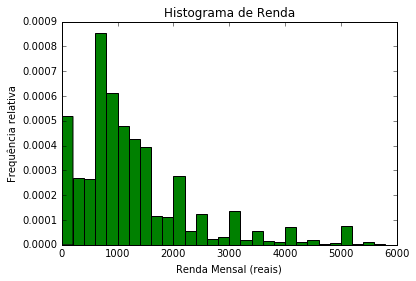

In [28]:
escolhas.Rendimento.describe()

renda_total = arange(0,6000,200)


plot = escolhas.Rendimento.plot.hist(bins=renda_total, normed=1, color="green")
plt.title("Histograma de Renda")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência relativa")

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


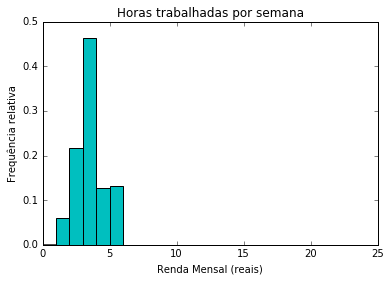

In [29]:


escolhas["Horas habitualmente trabalhadas por semana"].describe()

horas = arange(0,24,1)

plot = escolhas["Horas habitualmente trabalhadas por semana"].plot.hist(bins=horas, normed=1, color="c")
plt.title("Horas trabalhadas por semana")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência relativa")

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


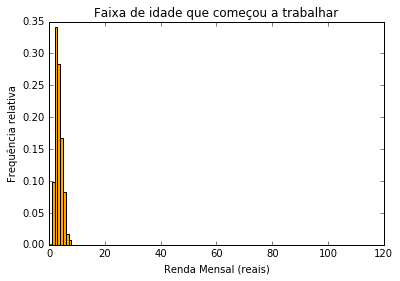

In [30]:
escolhas["Faixa de idade em que começou a trabalhar"].describe()

faixa_idade= arange(0,120,1)

plot = escolhas["Faixa de idade em que começou a trabalhar"].plot.hist(bins=faixa_idade, normed=1, color="orange")
plt.title("Faixa de idade que começou a trabalhar")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência relativa")

___
## Conclusão 

Descreva aqui suas conclusões!